# Runge-Kutta Experiment Report
Nonlinear Time Series Analysis - Computer Science Master's Degree Course - Federal University of São Paulo (UNIFESP) - Prof. Elbert E. N. Macau

Author: Rafael Leiniö

## Introduction

In numerical analysis, the Runge–Kutta methods are a family of important implicit and explicit iterative methods for the numerical resolution (approximation) of solutions of ordinary differential equations (ODEs). These techniques were developed around 1900 by mathematicians C. Runge and M.W. Kutta.

Given a ODE (with an initial value) on the form of:

![](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-5c0f705511162d6c6e098ed42bbf2c36_l3.svg)

The classical Runge-Kutta iterative formulas are the following:

![](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-266fa6a8dfb690331b0e5b11eae21e6c_l3.svg)

The formula basically computes next value yn+1 using current yn plus weighted average of four increments.
- K1 is the increment based on the slope at the beginning of the interval, using y
- K2 is the increment based on the slope at the midpoint of the interval, using y + hk1/2.
- K3 is again the increment based on the slope at the midpoint, using using y + hk2/2.
- K4 is the increment based on the slope at the end of the interval, using y + hk3.

The method is a fourth-order method, meaning that the local truncation error is on the order of O(h5), while the total accumulated error is order O(h4).

## Implementation

The Implementation can be found in the algorithms module [here](https://github.com/rafaelleinio/ntsa/blob/master/ntsa/algorithms/runge_kutta.py)

## Experiments:


In [10]:
# fix working dir
import pathlib
import os
path = os.path.join(pathlib.Path().absolute(), '../..')
os.chdir(path)

# imports
from ntsa.algorithms import RungeKutta
from ntsa.tools import DataViz
data_viz = DataViz()

# 1st Example

Given an EDO in the form of

#### `dy/dt = (t - y)/2`

#### With `t0 = 0`, `y0 = 1`, calculating `t = 2`:

In [11]:
dydt = lambda t, y: (t - y)/2

In [12]:
solver = RungeKutta(t0=0, y0=1, h=0.1, dydt=dydt)
solver.calculate_y(target_t=2)

1.103638383442619

#### Ploting the series of calculated points for different values of `h` (`h = 0.5`, `h = 0.1`, `h = 0.01`, `h = 0.001`)

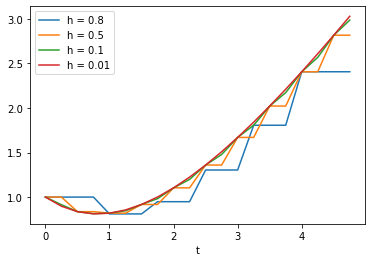

In [7]:
tests = [0.8, 0.5, 0.1, 0.01]

for h in tests:
    solver = RungeKutta(t0=0, y0=1, h=h, dydt=dydt)
    data_points = solver.calculate_y_series(start_t=0, step=0.25, n=20)
    data_viz.plot_data(data_points, label="h = {}".format(h))

data_viz.show()

# 2nd Example

Given an EDO in the form of

#### `dy/dt = t²y`

#### With `t0 = 0`, `y0 = 1`

#### Ploting the series of calculated points for different values of `h` (`h = 0.5`, `h = 0.1`, `h = 0.01`, `h = 0.001`)

In [8]:
dydt = lambda t, y: (t * t) * y

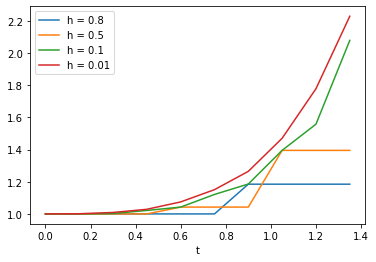

In [9]:
tests = [0.8, 0.5, 0.1, 0.01]

for h in tests:
    solver = RungeKutta(t0=0, y0=1, h=h, dydt=dydt)
    data_points = solver.calculate_y_series(start_t=0, step=0.15, n=10)
    data_viz.plot_data(data_points, label="h = {}".format(h))

data_viz.show()